In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

(500, 960, 3)


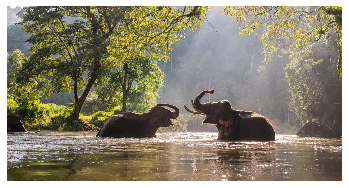

In [2]:
img=cv2.imread('elephants.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
print(img.shape)
plt.imshow(img)
plt.axis('off')
plt.show()

(650, 1200, 3)


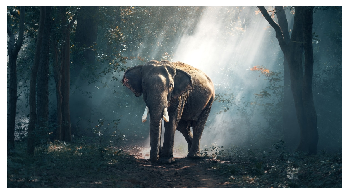

In [3]:
img_2=cv2.imread('elephants._2.jpg')
img_2=cv2.cvtColor(img_2,cv2.COLOR_BGR2RGB)
print(img_2.shape)
plt.imshow(img_2)
plt.axis('off')
plt.show()

## Flattening the Image Array into a format with one pixel in one row

In [4]:
X=img.reshape((img.shape[0]*img.shape[1],3))
print(X.shape)

(480000, 3)


In [5]:
X

array([[160, 163, 168],
       [165, 168, 173],
       [164, 167, 174],
       ...,
       [ 79,  65,  54],
       [ 78,  64,  53],
       [ 77,  63,  52]], dtype=uint8)

In [6]:
km=KMeans(n_clusters=4)

In [7]:
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [8]:
centers=km.cluster_centers_   # So, these are the most dominant colors
print(centers)

[[ 61.8492198   55.60846659  38.80339778]
 [155.86562208 149.04073129 133.04249893]
 [117.98871341 108.1105777   74.72664023]
 [202.87538506 193.95677856 171.1636762 ]]


In [9]:
colors_arr=np.array(centers,dtype='uint8')

In [10]:
Ypred=km.labels_

In [11]:
np.unique(Ypred)

array([0, 1, 2, 3])

In [12]:
mat_color=np.zeros((15*15,3),dtype='uint8')

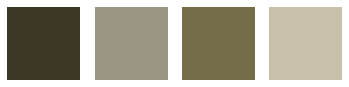

In [13]:
i=1
colors=[]
plt.figure()
for each_col in colors_arr:
    plt.subplot(1,4,i)
    i+=1
    colors.append(each_col)
    a=np.zeros((100,100,3),dtype='uint8')
    a[:,:,:]=each_col
    plt.imshow(a)
    plt.axis('off')
    
plt.show()

## Segmenting Our Original Image

In [14]:
Ypred.shape

(480000,)

In [15]:
segmented_img=np.zeros((Ypred.shape[0],3),dtype='uint8')

In [16]:
colors

[array([61, 55, 38], dtype=uint8),
 array([155, 149, 133], dtype=uint8),
 array([117, 108,  74], dtype=uint8),
 array([202, 193, 171], dtype=uint8)]

In [17]:
for ix in range(segmented_img.shape[0]):
    segmented_img[ix]=colors[km.labels_[ix]]

In [18]:
new_segmented_img=segmented_img.reshape((500,960,3))

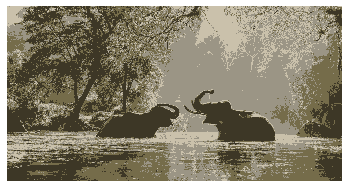

In [19]:
plt.imshow(new_segmented_img)
# plt.imshow(img)
plt.axis('off')
plt.show()